# Geo Week - Monday - Graph

We have some safe graph data... What does it look like? How can we use it?

Luckily there was a code to get <b>FREE</b> data!

https://shop.safegraph.com/

code: GISDAY

In [1]:
# Get the safe graph data
!mkdir 08 & mkdir 09 && mkdir 10
!unzip -o "CA-CA-72251511-11-2020-18-30-CORE_POI-GEOMETRY-PATTERNS-2020_08-2020-11-12.zip" -d ./08
!unzip -o "CA-CA-72251511-11-2020-18-30-CORE_POI-GEOMETRY-PATTERNS-2020_09-2020-11-12.zip" -d ./09
!unzip -o "CA-CA-72251511-11-2020-18-30-CORE_POI-GEOMETRY-PATTERNS-2020_10-2020-11-12.zip" -d ./10

mkdir: cannot create directory ‘09’: File exists
mkdir: cannot create directory ‘08’: File exists
Archive:  CA-CA-72251511-11-2020-18-30-CORE_POI-GEOMETRY-PATTERNS-2020_08-2020-11-12.zip
  inflating: ./08/core_poi-geometry-patterns.csv  
  inflating: ./08/brand_info.csv     
  inflating: ./08/README.txt         
  inflating: ./08/normalization_stats.csv  
  inflating: ./08/home_panel_summary.csv  
  inflating: ./08/visit_panel_summary.csv  
Archive:  CA-CA-72251511-11-2020-18-30-CORE_POI-GEOMETRY-PATTERNS-2020_09-2020-11-12.zip
  inflating: ./09/core_poi-geometry-patterns.csv  
  inflating: ./09/brand_info.csv     
  inflating: ./09/README.txt         
  inflating: ./09/normalization_stats.csv  
  inflating: ./09/home_panel_summary.csv  
  inflating: ./09/visit_panel_summary.csv  
Archive:  CA-CA-72251511-11-2020-18-30-CORE_POI-GEOMETRY-PATTERNS-2020_10-2020-11-12.zip
  inflating: ./10/core_poi-geometry-patterns.csv  
  inflating: ./10/brand_info.csv     
  inflating: ./10/README.txt  

In [2]:
!cat 08/README.txt

﻿Thank you for shopping at the SafeGraph Data Bar!

* DOCUMENTATION and DATA SCHEMAS are at https://docs.safegraph.com/docs

* If you need help parsing the JSON columns or using the data in ESRI, please see our FAQs at https://docs.safegraph.com/docs/faqs

* Let us know if you have any questions or issues by emailing us at support@safegraph.com

* Happy exploring!

In [3]:
import glob
import pandas as pd
data = glob.glob("./08/*.csv")

dfs = {}
for d in data:
    print(d)
    dfs[d] = pd.read_csv(d)

./08/normalization_stats.csv
./08/visit_panel_summary.csv
./08/brand_info.csv
./08/home_panel_summary.csv
./08/core_poi-geometry-patterns.csv


In [4]:
[print(k, v) for k, v in dfs.items()]

./08/normalization_stats.csv       year  month  day      region  total_visits  total_devices_seen  \
0     2020      8    1  ALL_STATES      52289374            17754355   
1     2020      8    1          ak         61054               24281   
2     2020      8    1          al       1368406              418637   
3     2020      8    1          ar        691724              220623   
4     2020      8    1          as           106                  74   
...    ...    ...  ...         ...           ...                 ...   
1762  2020      8   31          vt         51384               21002   
1763  2020      8   31          wa        788058              302535   
1764  2020      8   31          wi        836976              302479   
1765  2020      8   31          wv        258862               94691   
1766  2020      8   31          wy         79598               28818   

      total_home_visits  total_home_visitors  
0              23260128             14050302  
1           

[None, None, None, None, None]

Looking at the data we can see a number of interesting attributes.

But it is somewhat challenging to discern which ones are coffee shops.

We'll have to go through an identify these.

# Three questions

## Q1: How long does it take for starbucks to make a cup of coffee?

Due to the pandemic is pretty much impossible to stay at starbucks.

Therefore we can estimate the time to get a coffee using "median_dwell" and "bucketed_dwell_times"

## Q2: Are Starbucks customers loyal

We can also check to see if a customer goes to a competing brand by looking at
"related_same_day_brand" and "related_same_month_brand"

## Q3: Do customers goto competing locations even when they are close to their first choice?

We can plot a map and see where the locations are!


In [5]:
# We'll use the main data file core_poi-geometry-patterns.csv 
import os

filename = "core_poi-geometry-patterns.csv"
months = ['08', '09', '10']

c_dfs =[]

for m in months:
    c_dfs.append(pd.read_csv(os.path.join(m, filename)))
    
all_data = pd.concat(c_dfs)

In [6]:
all_data.head()

,placekey,safegraph_place_id,parent_safegraph_place_id,safegraph_brand_ids,location_name,brands,top_category,sub_category,naics_code,latitude,...,visitor_work_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type
0,238-222@5vg-7gz-tqf,sg:a0563af6ad104a68b48785d5379e730d,NaN,NaN,Easy Breezy Frozen Yogurt,NaN,Restaurants and Other Eating Places,Snack and Nonalcoholic Beverage Bars,722515,37.751632,...,{},"{""US"":42}",5189.0,12.0,"{""<5"":3,""5-20"":31,""21-60"":13,""61-240"":6,"">240"":1}",{},"{""Starbucks"":32,""Peet's Coffee and Tea"":29,""Sa...","[1,1,1,1,1,1,1,1,1,2,6,6,3,7,12,8,9,6,5,4,5,4,...","{""Monday"":13,""Tuesday"":3,""Wednesday"":9,""Thursd...","{""android"":12,""ios"":32}"
1,222-222@5vg-7f8-49z,sg:b6deb77184c644819288ba0a47ef4f75,NaN,NaN,Cafe DeStijl,NaN,Restaurants and Other Eating Places,Snack and Nonalcoholic Beverage Bars,722515,37.801403,...,{},"{""US"":24}",31584.0,19.0,"{""<5"":0,""5-20"":18,""21-60"":10,""61-240"":4,"">240"":3}",{},"{""Costco Wholesale Corp."":42,""Starbucks"":28,""I...","[3,1,1,0,1,1,3,2,3,8,5,4,1,5,7,3,0,6,4,6,3,3,4,4]","{""Monday"":8,""Tuesday"":4,""Wednesday"":1,""Thursda...","{""android"":14,""ios"":15}"
2,zzw-22b@5vg-7gq-fpv,sg:10c639a044e74f8bb976ace7d13429ed,NaN,NaN,La Boulangerie De San Francisco Hayes Valley,NaN,Restaurants and Other Eating Places,Snack and Nonalcoholic Beverage Bars,722515,37.776798,...,{},"{""US"":88}",13581.0,14.5,"{""<5"":6,""5-20"":62,""21-60"":38,""61-240"":10,"">240...","{""Costco Wholesale Corp."":19}","{""Starbucks"":40,""Safeway"":32,""In-N-Out Burger""...","[3,1,0,0,0,0,0,3,5,3,7,10,20,12,12,12,10,8,20,...","{""Monday"":11,""Tuesday"":5,""Wednesday"":10,""Thurs...","{""android"":48,""ios"":49}"
3,22t-222@5vg-7gt-cdv,sg:85ee80212e764c25a9038a9bb99f6853,NaN,NaN,Ten Ren's Tea,NaN,Restaurants and Other Eating Places,Snack and Nonalcoholic Beverage Bars,722515,37.792136,...,{},"{""US"":14}",112464.0,17.5,"{""<5"":0,""5-20"":14,""21-60"":3,""61-240"":2,"">240"":1}","{""Yogurtland"":100}","{""Starbucks"":51,""Target"":40,""In-N-Out Burger"":...","[1,1,1,1,1,1,1,1,2,2,2,4,3,2,1,3,2,5,7,0,0,0,1,1]","{""Monday"":1,""Tuesday"":5,""Wednesday"":0,""Thursda...","{""android"":10,""ios"":8}"
4,22v-222@5vg-7h3-8jv,sg:568e09862f4b45aa856168e3a50cdd7e,NaN,NaN,The Plant Cafe Organic,NaN,Restaurants and Other Eating Places,Snack and Nonalcoholic Beverage Bars,722515,37.759984,...,{},"{""US"":16}",10784.0,35.5,"{""<5"":2,""5-20"":7,""21-60"":4,""61-240"":6,"">240"":3}",{},"{""Starbucks"":46,""Costco Wholesale Corp."":38,""I...","[0,0,0,0,0,0,0,1,2,6,6,6,4,5,4,5,4,1,6,1,0,0,0,0]","{""Monday"":4,""Tuesday"":3,""Wednesday"":5,""Thursda...","{""android"":7,""ios"":15}"


In [7]:
potential_coffee = all_data["location_name"].unique()

In [8]:
starbucks = all_data[all_data["location_name"] == "Starbucks"]

<AxesSubplot:ylabel='Frequency'>

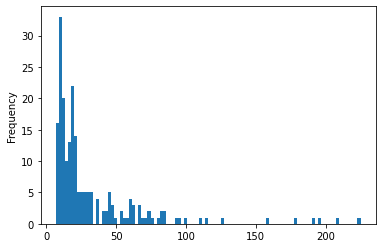

In [9]:
starbucks.median_dwell.plot.hist(bins=100)

In [10]:
starbucks.median_dwell.describe()

count    206.000000
mean      32.208738
std       36.369011
min        7.000000
25%       12.000000
50%       20.000000
75%       36.750000
max      225.000000
Name: median_dwell, dtype: float64

# 7-20 Minutes to get a coffee @ Starbucks

In [11]:
# Now lets check the competion visits
starbucks_c = starbucks.fillna(value='{}', inplace=False)

starbucks_c['combined_visits'] = starbucks_c.apply(lambda x: {**eval(x.related_same_day_brand), **eval(x.related_same_month_brand)}, axis=1)
starbucks_c['compete'] = starbucks_c.apply(lambda x: 1 if any(list(k in potential_coffee for k in x.combined_visits)) else 0, axis=1)

<AxesSubplot:ylabel='Frequency'>

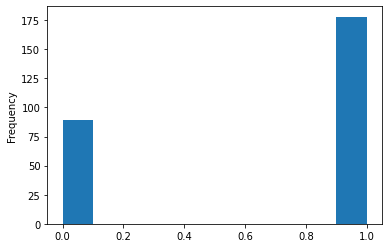

In [12]:
starbucks_c.compete.plot.hist()

In [13]:
# Now the issue is that there are many other things apart from coffee.. lets use just coffee

starbucks_c["coffee"] = starbucks_c.combined_visits.apply(lambda x: True if ['coffee' in location for location in [k.lower() for k in x.keys()]] else False)

<AxesSubplot:ylabel='Frequency'>

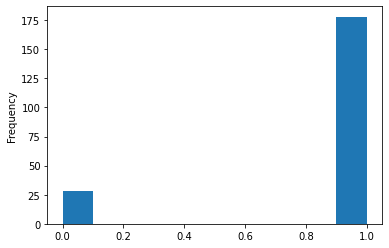

In [14]:
starbucks_c[starbucks_c.coffee == True].compete.plot.hist()

# Wow! Brand loyalty!? Looks like people like different coffee?

Using this crude approximation we can see that Starbucks customers may not be loyal. More exploration neeeded...

In [15]:
import geopandas as gpd
from shapely.geometry import Point

In [26]:
starbucks_c['geometry'] = starbucks_c.apply(lambda x: Point(x.longitude, x.latitude), axis=1)
gdf = gpd.GeoDataFrame(starbucks_c, geometry="geometry")
gdf.crs = "EPSG:4326"

In [17]:
pip install contextily

Note: you may need to restart the kernel to use updated packages.


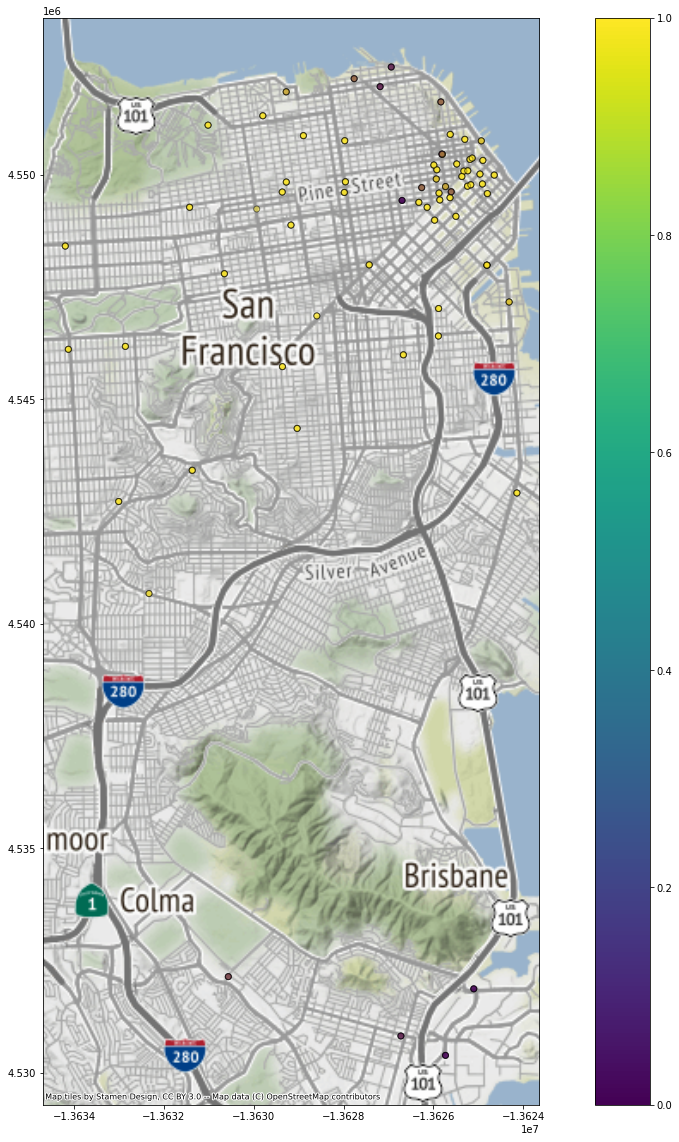

In [29]:
import contextily as ctx
gdf = gdf.to_crs(epsg=3857)
ax = gdf[gdf.coffee == True].plot(column="compete", figsize=(20, 20), alpha=0.5, edgecolor='k', legend=True)
ctx.add_basemap(ax, zoom=12)